# Ornstein-Uhlenbeck Process

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

We will create a plot of a Ornstein-Uhlenbeck Process. This is a stochastic process given by $X_t = e^{-\beta t} \ W_{e^{2\beta t}}$.

In [75]:
beta = 0.2       # Coefficient
T = 5.0          # Total time
dt = 0.01        # Time step
N = int(T/dt)    # Number of steps

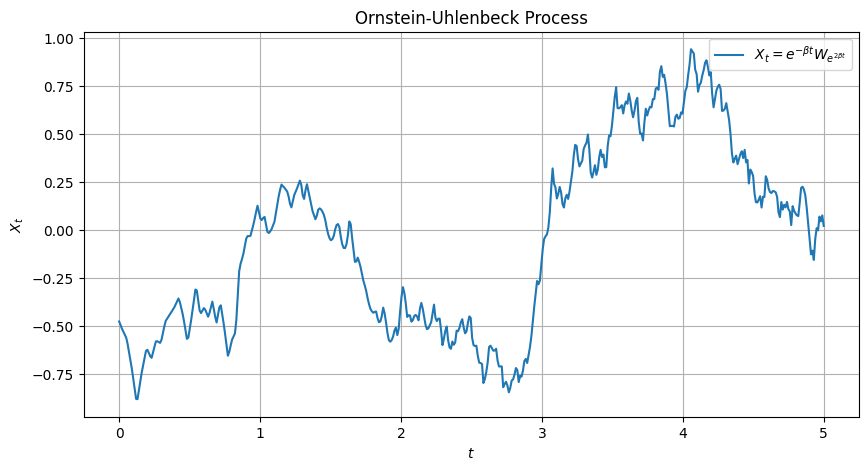

In [85]:
t = np.linspace(0, T, N)
time_changed = np.exp(2 * beta * t)
fine_t = np.linspace(0, time_changed[-1], N)
dw_fine = np.random.normal(0, np.sqrt(fine_t[1] - fine_t[0]), size=fine_t.shape)
w_fine = np.cumsum(dw_fine)

from scipy.interpolate import interp1d
W_interp = interp1d(fine_t, w_fine, kind='linear', fill_value="extrapolate")  # Interpolate to get W_{e^{2\beta t}}
W_time_changed = W_interp(time_changed)

X_t = np.exp(-beta * t) * W_time_changed                                      # Computing the Ornstein-Uhlenbeck process

plt.figure(figsize=(10, 5))
plt.plot(t, X_t, label=r'$X_t = e^{-\beta t} W_{e^{2\beta t}}$')
plt.title("Ornstein-Uhlenbeck Process")
plt.xlabel("$t$")
plt.ylabel("$X_t$")
plt.grid(True)
plt.legend()
plt.show()